# Art as Data

[Project extensions are at the bottom of this file]

Piet Mondrian was a Dutch artist best known for his abstract, grid-like designs during the 1920s and 30s. Mondrian was part of an art movement that aimed to explore and express simplicity by using only the most basic colors and shapes.

How might we represent the features of a Mondrian painting using tabular data? Here is one approach:

| painting_id | feature | x   | y   | width | height | color  | rgb      |
|------------|---------|-----|-----|-------|--------|--------|----------|
| b219       | rect    | 0   | 0   | 121   | 152    | white  | #ffffff  |
| b219       | rect    | 132 | 0   | 378   | 365    | red    | #e6151a  |
| b219       | rect    | 0   | 173 | 121   | 192    | white  | #ffffff  |
| b219       | rect    | 0   | 377 | 121   | 133    | blue   | #2f5a9f  |
| b219       | rect    | 132 | 377 | 335   | 133    | white  | #ffffff  |
| b219       | rect    | 479 | 377 | 31    | 59     | white  | #ffffff  |
| b219       | rect    | 479 | 451 | 31    | 59     | yellow | #f7ed2d  |
| b219       | h-line  | 0   | 365 | 510   | 12     | black  | #000000  |
| b219       | v-line  | 121 | 0   | 11    | 510    | black  | #000000  |
| b219       | v-line  | 467 | 377 | 12    | 133    | black  | #000000  |
| b219       | h-line  | 0   | 152 | 121   | 21     | black  | #000000  |
| b219       | h-line  | 479 | 436 | 31    | 15     | black  | #000000  |

This table represents the features of the painting using 12 rows of data. Notice how each row represents a rectangular shape with x-y coordinates, size and color info.

By representing art as data, we open up artistic analysis to a broad range of data science techniques. In this project, we will explore Mondrian's quest for artistic simplicity and try our hands at detecting fake paintings falsely attributed to Mondrian.

### Loading the Data
The `mondrian-painting-features.csv` file contains digitized features for 136 Mondrian paintings over the 2 decades from 1920 to 1940. Load the data into python and take a look.

Activity Goals:
- Import pandas.
- Load the features data.
- Display the dataframe.

In [22]:
# FOR GOOGLE COLAB ONLY.
# Uncomment and run the code below. A dialog will appear to upload files.
# Upload 'mondrian-painting-features.csv', 'mondrian-painting-info.csv', and 'fp26-features.csv'.

# from google.colab import files
# uploaded = files.upload()

In [23]:
import pandas as pd
pd.options.display.max_rows = 10 

features = pd.read_csv('mondrian-painting-features.csv')
features 

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
3,b104,rect,0,18,146,468,white,#cfd0ce
4,b104,rect,151,18,107,111,black,#151d16
...,...,...,...,...,...,...,...,...
3199,b296,v-line,620,0,19,825,black,#000000
3200,b296,v-line,49,508,19,79,black,#000000
3201,b296,h-line,0,268,711,19,black,#000000
3202,b296,h-line,0,489,711,19,black,#000000


The first painting in this dataset has an ID of b104. We can see that there are multiple rows with that same painting ID.

Let's use a `query` to extract all the features associated with that first painting.

Activity Goal:
- Find all the features for painting b104.

In [24]:
features.query('painting_id == "b104"')

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
3,b104,rect,0,18,146,468,white,#cfd0ce
4,b104,rect,151,18,107,111,black,#151d16
...,...,...,...,...,...,...,...,...
36,b104,v-line,727,0,5,1007,black,#000000
37,b104,v-line,258,18,5,111,black,#000000
38,b104,v-line,531,134,5,809,black,#000000
39,b104,v-line,944,134,5,873,black,#000000


From this we see that painting b104 has 41 features.

We have got the features for this painting, but what if we are interested in the year it was painted?

For that, we need to load up a separate data file: `mondrian-painting-info.csv`.

Activity Goals:
- Load the painting info data.
- Display the dataframe.

In [25]:
painting_info = pd.read_csv('mondrian-painting-info.csv')
painting_info

,painting_id,year,title,width,height
0,b104,1920,No. VI,1010,1007
1,b105,1920,Composition A,918,900
2,b106,1920,Composition B,575,677
3,b107,1920,Composition C,610,603
4,b108,1920,Composition I,646,750
...,...,...,...,...,...
131,b292,1939,Composition no. 1,1023,1052
132,b293,1939,"Composition of red, blue and white: II",330,435
133,b294,1939,Trafalgar Square,1200,1452
134,b295,1939,Composition no. 8,681,752


Each row represents one painting. Now we see that b104 was painted in the year 1920. Later, when we calculate painting metrics, we'll merge additional columns onto this `painting_info` dataframe.

### Turning Data into Pictures
For this project, we've provided the following function to draw Mondrian paintings from data:


In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
def draw_mondrian( painting_id ):
    rects = features.query('painting_id == @painting_id')
    total_width = rects.eval("x + width").max()
    total_height = rects.eval("y + height").max()
    
    fig, ax = plt.subplots(figsize=(3, 3))
    
    for (idx, row) in rects.iterrows():
        x, y, w, h, rgb = row[['x','y','width','height','rgb']]
        patch = mpatches.Rectangle((x, y), w, h, facecolor=rgb)
        ax.add_patch(patch)
    
    ax.axis([0, total_width, 0, total_height])
    ax.set_aspect('equal')
    ax.axis('off')
    fig.text(0.5, 0.01, painting_id, ha="center", fontsize=14)


Internally, this function uses Matplotlib to draw each feature as a rectangular patch of color. While the details of this function are not the focus of this project, feel free to take a look at the code to see how it works.

We can run this function any time we want to visualize a painting. For example, let's see what the first painting in our dataset (b104) looks like.

Activity Goal:
- Draw painting bl014.

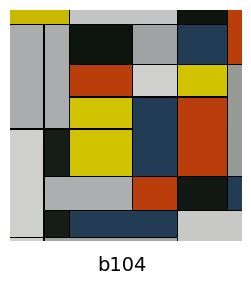

In [27]:
draw_mondrian('b104')

We went from art to data and back again. Cool!

### Comparing Complexity

As mentioned earlier, Piet Mondrian was part of a movement to simplify artistic expression. Do Mondrian paintings vary substantially in their simplicity?

Let's use our `draw_mondrian()` function to draw two separate paintings and see if we notice any differences in complexity.

Activity Goal:
- Draw two separate Mondrain paintings.


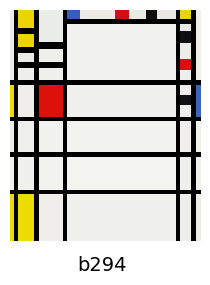

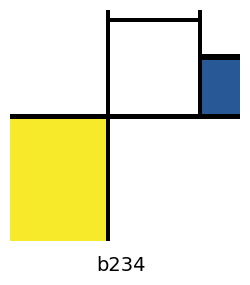

In [28]:
draw_mondrian('b294')
draw_mondrian('b234')

The left painting is more complex due to having more horizontal lines, vertical lines, and rectangles.

### Quantifying Complexity
Art researchers have used a variety of approaches to quantify the complexity of Mondrian paintings. Perhaps the easiest method is to simply count the number of features in a given painting. Let's explore this basic metric and see if we encounter any interesting trends over time.

As a reminder, here is the `features` dataframe.

In [29]:
pd.options.display.max_rows = 6
features

,painting_id,feature,x,y,width,height,color,rgb
0,b104,rect,0,0,146,13,white,#ced2ca
1,b104,rect,151,0,576,13,gray,#a4a7a7
2,b104,rect,732,0,278,129,gray,#c8c9c7
...,...,...,...,...,...,...,...,...
3201,b296,h-line,0,268,711,19,black,#000000
3202,b296,h-line,0,489,711,19,black,#000000
3203,b296,h-line,0,679,11,28,black,#000000


To count the number of features for each painting, let's use `df.groupby()`.

Activity Goals:
- Group the features by painting_id.
- Count the number of rows in each group.
- Display the counts.

In [30]:
pd.options.display.max_rows = 10
sizes = features.groupby('painting_id').size()
sizes #display the result


painting_id
b104    41
b105    42
b106    41
b107    44
b108    44
        ..
b292    31
b293    26
b294    62
b295    47
b296    49
Length: 136, dtype: int64

This gives us the number of features for all 136 paintings. The output above is a 1-dimensional series where the index is the `painting_id`.

Let's turn the series into a dataframe by calling `reset_index( )`.

In [31]:
complexity_df = sizes.reset_index(name='complexity')
complexity_df

,painting_id,complexity
0,b104,41
1,b105,42
2,b106,41
3,b107,44
4,b108,44
...,...,...
131,b292,31
132,b293,26
133,b294,62
134,b295,47


This gives us a dataframe with the complexity (number of features) for each painting ID. null We now have complexity data for all 136 paintings.

### Merging Data
We want to plot complexity over time, but currently we have complexity in one dataframe and the year in a different dataframe.

In [32]:
pd.options.display.max_rows = 6
complexity_df

,painting_id,complexity
0,b104,41
1,b105,42
2,b106,41
...,...,...
133,b294,62
134,b295,47
135,b296,49


In [33]:
painting_info


,painting_id,year,title,width,height
0,b104,1920,No. VI,1010,1007
1,b105,1920,Composition A,918,900
2,b106,1920,Composition B,575,677
...,...,...,...,...,...
133,b294,1939,Trafalgar Square,1200,1452
134,b295,1939,Composition no. 8,681,752
135,b296,1940,Composition no. 11,711,825


Let's add the complexity data into the `painting_info` dataframe using a left merge. This will allow us to plot how complexity changes by year.

Merging dataframes in Pandas is like joining tables in SQL. We need to specify which columns will be used to find matching rows. In our case, each row for both dataframes represents a single painting. Rows can be matched using the `painting_id` column.

Activity Goals:
- Merge `complexity_df` into `painting_info`.
- Display the result.

In [34]:
pd.options.display.max_rows = 10
painting_info = painting_info.merge(complexity_df, on='painting_id', how='left')
painting_info

,painting_id,year,title,width,height,complexity
0,b104,1920,No. VI,1010,1007,41
1,b105,1920,Composition A,918,900,42
2,b106,1920,Composition B,575,677,41
3,b107,1920,Composition C,610,603,44
4,b108,1920,Composition I,646,750,44
...,...,...,...,...,...,...
131,b292,1939,Composition no. 1,1023,1052,31
132,b293,1939,"Composition of red, blue and white: II",330,435,26
133,b294,1939,Trafalgar Square,1200,1452,62
134,b295,1939,Composition no. 8,681,752,47


We have now merged the `complexity_df` into `painting_info`.

### Plotting Complexity over Time
Are you ready to make some graphs?

Let's visualize how complexity changes over the years for these Mondrian paintings. A scatterplot would work well for this.

Activity Goals:
- Import matplotlib.pyplot.
- Create a scatterplot of complexity over time.
- Label the axes.

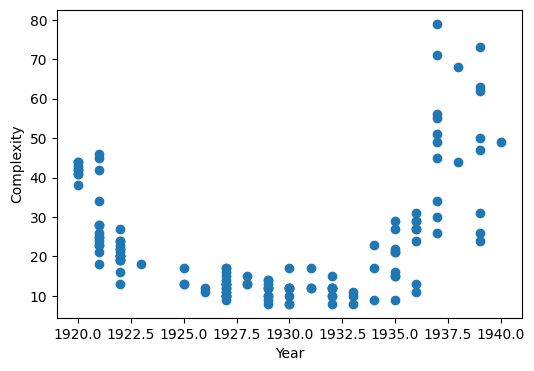

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['complexity'])
plt.xlabel('Year')
plt.ylabel('Complexity')
plt.show()

The complexity of Mondrian's paintings increases after 1935, indicating a shift in his artistic style.

### Detecting Possible Fake Paintings
Since Mondrian paintings can sell for millions of dollars, it's not hard to imagine that someone might try to create a forgery. The following is a widely shared painting claimed to be a Mondrian artwork from 1926.

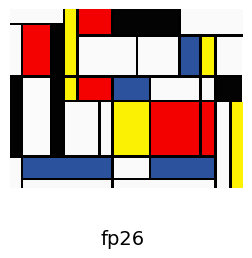

In [36]:
# code to plot the figure
rects = pd.read_csv('fp26-features.csv')
total_width = rects.eval("x + width").max()
total_height = rects.eval("y + height").max()

fig, ax = plt.subplots(figsize=(3, 3))

for (idx, row) in rects.iterrows():
	x, y, w, h, rgb = row[['x','y','width','height','rgb']]
	patch = mpatches.Rectangle((x, y), w, h, facecolor=rgb)
	ax.add_patch(patch)

ax.axis([0, total_width, 0, total_height])
ax.set_aspect('equal')
ax.axis('off')
fig.text(0.5, 0.01, 'fp26', ha="center", fontsize=14)
plt.show()


This painting doesn't show up in our catalog. Is it real or fake? Let's see what evidence we can glean from the data.

Load up the feature data for this painting from the file `fp26-features.csv`.

Activity Goals:
- Load the features for fake painting 1926.
- Display the Dataframe.

In [37]:
fp26_features = pd.read_csv('fp26-features.csv')
fp26_features 

,painting_id,feature,x,y,width,height,color,rgb
0,fp26,rect,0,0,34,92,white,#fafafa
1,fp26,rect,41,0,267,22,white,#f9f9f9
2,fp26,rect,317,0,309,22,white,#fafafa
3,fp26,rect,634,0,38,261,white,#fafafa
4,fp26,rect,680,0,32,261,yellow,#fcf202
...,...,...,...,...,...,...,...,...
49,fp26,h-line,206,462,506,8,black,#000000
50,fp26,h-line,0,497,166,8,black,#000000
51,fp26,v-line,270,96,9,169,black,#000000
52,fp26,v-line,580,96,7,370,black,#000000


Using our number of features metric for complexity, we can see that this painting has a complexity of 54.

Is a complexity of 54 consistent with other Mondrain paintings in the year 1926? Let's add this datapoint to our scatterplot for a visual comparison.

Activity Goals:
- Recreate the scatterplot from earlier.
- Plot the new point as a red square.
- Label the axes.

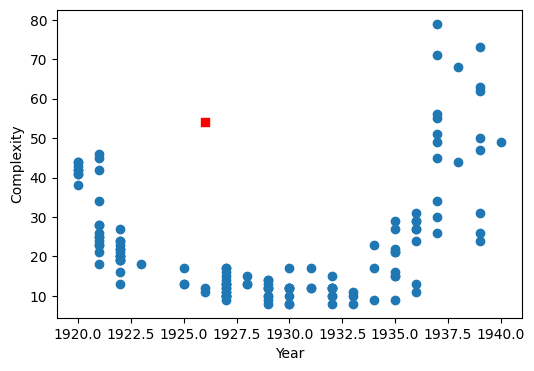

In [38]:
plt.figure(figsize=(6, 4))
plt.scatter(painting_info['year'], painting_info['complexity'])
plt.scatter(x=1926, y=54, color='red', marker='s')
plt.xlabel('Year')
plt.ylabel('Complexity')
plt.show()


The 1926 painting is an outlier with much higher complexity than other paintings from that period, suggesting it might be a fake.


## Project extensions

Here are some ideas for extending the project:

1. **Analyze painting dimensions over time**  
    
    Plot the length, width, or area of each painting against its creation date. Are there any noticeable trends or patterns?

2. **Track blue color usage over time**  
   - Compute the total area of each painting using data from `painting_info`.  

   - Identify features in the dataset where the color is 'blue'. 

   - Calculate the area of these blue features.  

   - Group the blue feature areas by `painting_id` and sum them. 

   - Merge this data with `painting_info`.  

   - Plot the percentage of blue in each painting over time.

   - Repeat with other colors (red, yellow, white, black, gray)

=== Extension 1: Painting Dimensions Over Time ===

Available columns in painting_info:
['painting_id', 'year', 'title', 'width', 'height', 'complexity']

Sample painting info data:
  painting_id  year  height  width
0        b104  1920    1007   1010
1        b105  1920     900    918
2        b106  1920     677    575
3        b107  1920     603    610
4        b108  1920     750    646



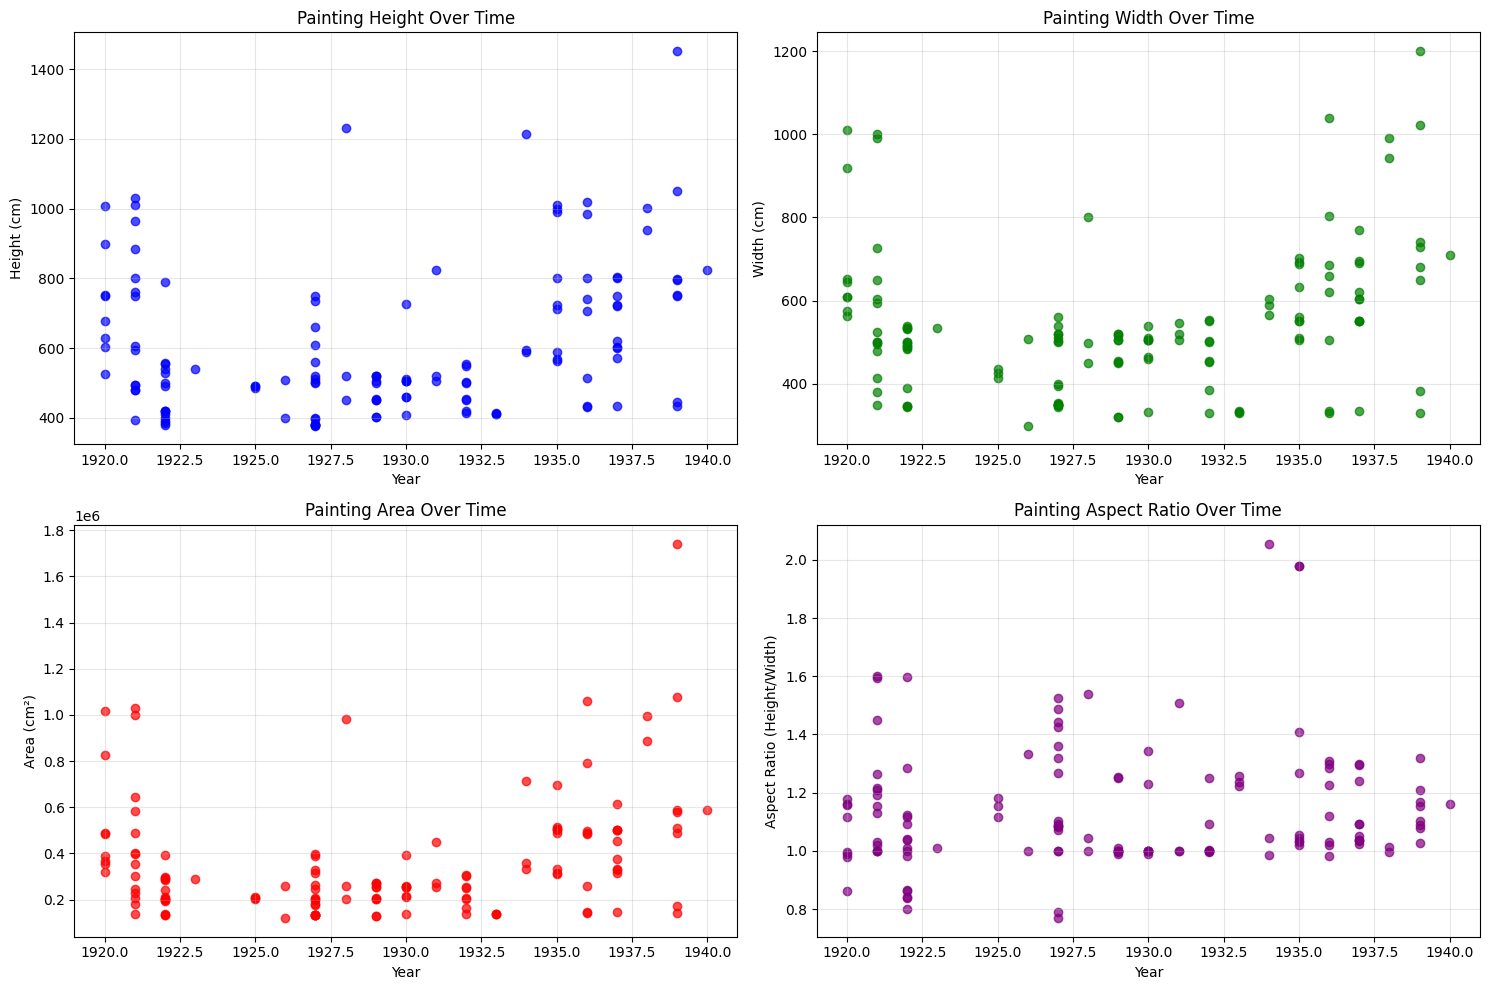

=== Dimension Statistics by Decade ===
        height                 width                 area_cm2             \
          mean     std count    mean     std count       mean        std   
decade                                                                     
1920    562.19  185.95    73  506.78  151.69    73  308022.82  212188.62   
1930    662.10  226.27    62  579.02  185.14    62  417495.95  285336.05   
1940    825.00     NaN     1  711.00     NaN     1  586575.00        NaN   

             aspect_ratio              
       count         mean   std count  
decade                                 
1920      73         1.12  0.20    73  
1930      62         1.16  0.23    62  
1940       1         1.16   NaN     1  


In [39]:
# Project Extension 1: Analyze painting dimensions over time
print("=== Extension 1: Painting Dimensions Over Time ===")
print()

# First, let's examine the painting_info dataframe to see what dimension data we have
print("Available columns in painting_info:")
print(painting_info.columns.tolist())
print()

# Display sample data to understand the structure
print("Sample painting info data:")
print(painting_info[['painting_id', 'year', 'height', 'width']].head())
print()

# Calculate area for each painting
painting_info['area_cm2'] = painting_info['height'] * painting_info['width']

# Create visualizations for dimensions over time
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Length over time
axes[0, 0].scatter(painting_info['year'], painting_info['height'], alpha=0.7, color='blue')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Height (cm)')
axes[0, 0].set_title('Painting Height Over Time')
axes[0, 0].grid(True, alpha=0.3)

# Width over time
axes[0, 1].scatter(painting_info['year'], painting_info['width'], alpha=0.7, color='green')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Width (cm)')
axes[0, 1].set_title('Painting Width Over Time')
axes[0, 1].grid(True, alpha=0.3)

# Area over time
axes[1, 0].scatter(painting_info['year'], painting_info['area_cm2'], alpha=0.7, color='red')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Area (cm²)')
axes[1, 0].set_title('Painting Area Over Time')
axes[1, 0].grid(True, alpha=0.3)

# Aspect ratio over time
painting_info['aspect_ratio'] = painting_info['height'] / painting_info['width']
axes[1, 1].scatter(painting_info['year'], painting_info['aspect_ratio'], alpha=0.7, color='purple')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Aspect Ratio (Height/Width)')
axes[1, 1].set_title('Painting Aspect Ratio Over Time')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Statistical analysis
print("=== Dimension Statistics by Decade ===")
painting_info['decade'] = (painting_info['year'] // 10) * 10
dimension_stats = painting_info.groupby('decade')[['height', 'width', 'area_cm2', 'aspect_ratio']].agg(['mean', 'std', 'count'])
print(dimension_stats.round(2))

=== Extension 2: Color Usage Analysis Over Time ===

Total painting areas calculated using length × width

Found 164 blue features across all paintings

Sample blue features with areas:
   painting_id color  width  height  feature_area
5         b104  blue    464     111         51504
9         b104  blue     61     143          8723
12        b104  blue    191     343         65513
23        b104  blue    212     172         36464
49        b105  blue    218      69         15042

Blue area by painting:
  painting_id  blue_area
0        b104     162204
1        b105      98645
2        b106      87395
3        b107      98919
4        b108      47813

Sample data with blue percentages:
  painting_id  year  area_cm2  blue_area  blue_percentage
0        b104  1920   1017070   162204.0        15.948165
1        b105  1920    826200    98645.0        11.939603
2        b106  1920    389275    87395.0        22.450710
3        b107  1920    367830    98919.0        26.892586
4        b108 

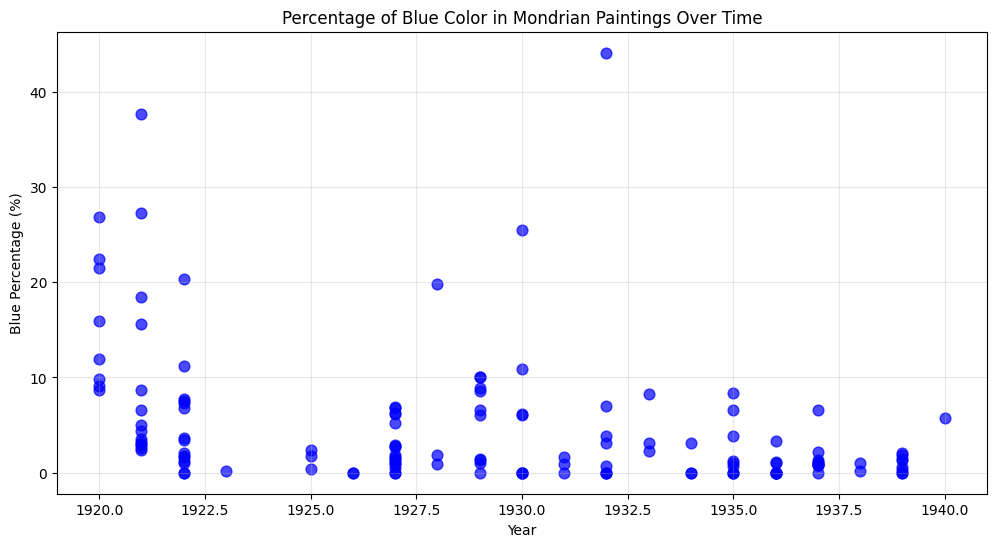

=== Blue Usage Statistics ===
Paintings with blue: 108
Paintings without blue: 28
Average blue percentage: 4.84%
Maximum blue percentage: 44.10%



In [42]:
# Project Extension 2: Track blue color usage over time
print("=== Extension 2: Color Usage Analysis Over Time ===")
print()

# Step 1: Calculate total area of each painting (already done above)
print("Total painting areas calculated using length × width")
print()

# Step 2: Identify features where color is 'blue'
blue_features = features[features['color'] == 'blue'].copy()
print(f"Found {len(blue_features)} blue features across all paintings")
print()

# Step 3: Calculate area of blue features
blue_features['feature_area'] = blue_features['width'] * blue_features['height']
print("Sample blue features with areas:")
print(blue_features[['painting_id', 'color', 'width', 'height', 'feature_area']].head())
print()

# Step 4: Group blue feature areas by painting_id and sum them
blue_area_by_painting = blue_features.groupby('painting_id')['feature_area'].sum().reset_index()
blue_area_by_painting.columns = ['painting_id', 'blue_area']
print("Blue area by painting:")
print(blue_area_by_painting.head())
print()

# Step 5: Merge with painting_info
painting_with_blue = painting_info.merge(blue_area_by_painting, on='painting_id', how='left')
painting_with_blue['blue_area'] = painting_with_blue['blue_area'].fillna(0)  # Fill NaN with 0 for paintings with no blue

# Step 6: Calculate percentage of blue
painting_with_blue['blue_percentage'] = (painting_with_blue['blue_area'] / painting_with_blue['area_cm2']) * 100

print("Sample data with blue percentages:")
print(painting_with_blue[['painting_id', 'year', 'area_cm2', 'blue_area', 'blue_percentage']].head(10))
print()

# Step 7: Plot blue percentage over time
plt.figure(figsize=(12, 6))
plt.scatter(painting_with_blue['year'], painting_with_blue['blue_percentage'], alpha=0.7, color='blue', s=60)
plt.xlabel('Year')
plt.ylabel('Blue Percentage (%)')
plt.title('Percentage of Blue Color in Mondrian Paintings Over Time')
plt.grid(True, alpha=0.3)
plt.show()

# Statistics for blue usage
print("=== Blue Usage Statistics ===")
print(f"Paintings with blue: {(painting_with_blue['blue_percentage'] > 0).sum()}")
print(f"Paintings without blue: {(painting_with_blue['blue_percentage'] == 0).sum()}")
print(f"Average blue percentage: {painting_with_blue['blue_percentage'].mean():.2f}%")
print(f"Maximum blue percentage: {painting_with_blue['blue_percentage'].max():.2f}%")
print()

=== Comprehensive Color Analysis Over Time ===

Calculating percentages for each color...
Red: 187 features found
Yellow: 177 features found
White: 1330 features found
Black: 1109 features found
Gray: 127 features found
Blue: 164 features found



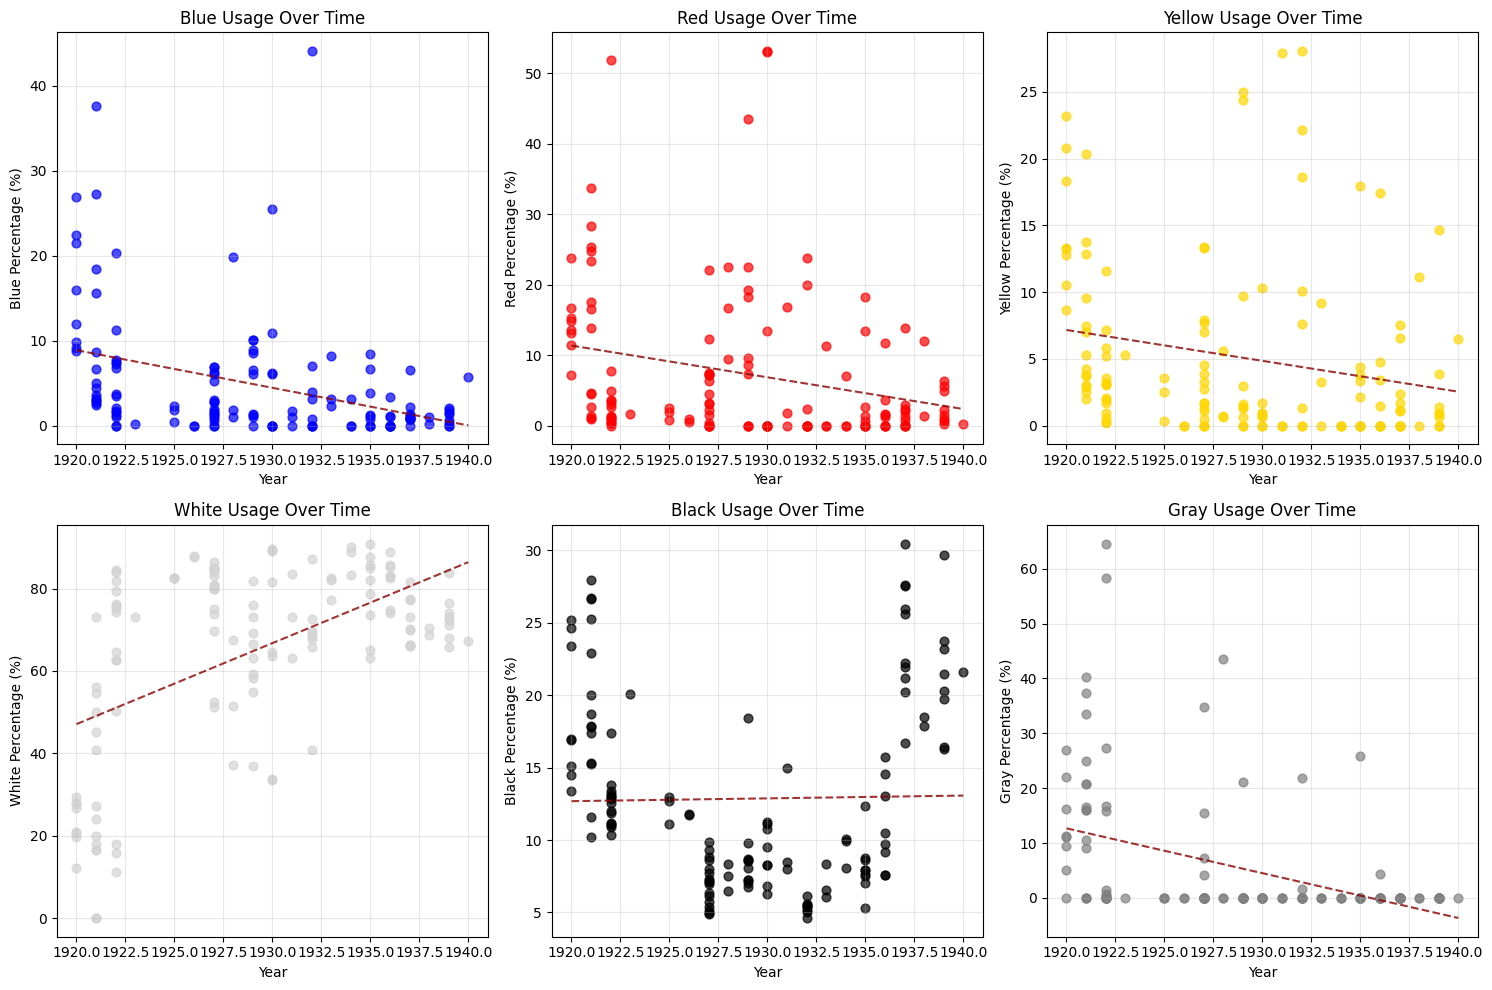

=== Color Usage Summary Statistics ===
    Color  Paintings with color  Paintings without color  Average %  Max %  \
0    Blue                   108                       28       4.84  44.10   
1     Red                   103                       33       7.25  53.18   
2  Yellow                   104                       32       5.05  28.06   
3   White                   134                        2      64.97  90.91   
4   Black                   136                        0      12.86  30.47   
5    Gray                    36                      100       5.25  64.59   

   Std %  
0   7.30  
1  10.76  
2   6.60  
3  22.61  
4   6.60  
5  11.74  

=== Color Usage by Decade ===
Color   Black  Blue  Gray   Red  White  Yellow
Decade                                        
1920s   12.66  6.49  9.04  9.15  56.88    5.82
1930s   12.96  2.88  0.86  5.13  74.48    4.13
1940s   21.61  5.71  0.00  0.20  67.15    6.46


In [44]:
# Extension 2 continued: Analyze all colors (red, yellow, white, black, gray)
import numpy as np

print("=== Comprehensive Color Analysis Over Time ===")
print()

# Function to calculate color percentage for any color
def calculate_color_percentage(color_name):
    # Get features of specified color
    color_features = features[features['color'] == color_name].copy()
    
    if len(color_features) == 0:
        return pd.DataFrame(columns=['painting_id', f'{color_name}_percentage'])
    
    # Calculate area of color features
    color_features['feature_area'] = color_features['width'] * color_features['height']
    
    # Group by painting and sum areas
    color_area_by_painting = color_features.groupby('painting_id')['feature_area'].sum().reset_index()
    color_area_by_painting.columns = ['painting_id', f'{color_name}_area']
    
    # Merge with painting info and calculate percentage
    painting_with_color = painting_info.merge(color_area_by_painting, on='painting_id', how='left')
    painting_with_color[f'{color_name}_area'] = painting_with_color[f'{color_name}_area'].fillna(0)
    painting_with_color[f'{color_name}_percentage'] = (painting_with_color[f'{color_name}_area'] / painting_with_color['area_cm2']) * 100
    
    return painting_with_color[['painting_id', 'year', f'{color_name}_percentage']]

# Analyze all colors
colors_to_analyze = ['red', 'yellow', 'white', 'black', 'gray']
color_data = {}

print("Calculating percentages for each color...")
for color in colors_to_analyze:
    color_data[color] = calculate_color_percentage(color)
    print(f"{color.capitalize()}: {len(features[features['color'] == color])} features found")

# We already have blue data
color_data['blue'] = painting_with_blue[['painting_id', 'year', 'blue_percentage']]
print(f"Blue: {len(blue_features)} features found")
print()

# Create comprehensive color usage plot
plt.figure(figsize=(15, 10))

# Plot each color
colors_to_plot = ['blue', 'red', 'yellow', 'white', 'black', 'gray']
color_palette = ['blue', 'red', 'gold', 'lightgray', 'black', 'gray']

for i, (color, plot_color) in enumerate(zip(colors_to_plot, color_palette)):
    plt.subplot(2, 3, i+1)
    
    if color in color_data and len(color_data[color]) > 0:
        data = color_data[color]
        plt.scatter(data['year'], data[f'{color}_percentage'], 
                   alpha=0.7, color=plot_color, s=40)
        plt.xlabel('Year')
        plt.ylabel(f'{color.capitalize()} Percentage (%)')
        plt.title(f'{color.capitalize()} Usage Over Time')
        plt.grid(True, alpha=0.3)
        
        # Add trend line
        if len(data) > 1:
            z = np.polyfit(data['year'], data[f'{color}_percentage'], 1)
            p = np.poly1d(z)
            plt.plot(data['year'], p(data['year']), "--", alpha=0.8, color='darkred')

plt.tight_layout()
plt.show()

# Create summary statistics
print("=== Color Usage Summary Statistics ===")
summary_stats = []

for color in colors_to_plot:
    if color in color_data and len(color_data[color]) > 0:
        data = color_data[color]
        percentage_col = f'{color}_percentage'
        
        stats = {
            'Color': color.capitalize(),
            'Paintings with color': (data[percentage_col] > 0).sum(),
            'Paintings without color': (data[percentage_col] == 0).sum(),
            'Average %': data[percentage_col].mean(),
            'Max %': data[percentage_col].max(),
            'Std %': data[percentage_col].std()
        }
        summary_stats.append(stats)

summary_df = pd.DataFrame(summary_stats)
print(summary_df.round(2))
print()

# Analyze color trends over decades
print("=== Color Usage by Decade ===")
decade_analysis = []

for color in colors_to_plot:
    if color in color_data and len(color_data[color]) > 0:
        data = color_data[color].copy()
        data['decade'] = (data['year'] // 10) * 10
        decade_stats = data.groupby('decade')[f'{color}_percentage'].mean()
        
        for decade, avg_percentage in decade_stats.items():
            decade_analysis.append({
                'Color': color.capitalize(),
                'Decade': f"{decade}s",
                'Average %': avg_percentage
            })

decade_df = pd.DataFrame(decade_analysis)
decade_pivot = decade_df.pivot(index='Decade', columns='Color', values='Average %')
print(decade_pivot.round(2))

=== Advanced Color Analysis & Insights ===

Master color dataframe sample:
  painting_id  year  area_cm2  complexity  blue_percentage  red_percentage  \
0        b104  1920   1017070          41        15.948165       14.834082   
1        b105  1920    826200          42        11.939603       11.371581   
2        b106  1920    389275          41        22.450710       13.494059   
3        b107  1920    367830          44        26.892586       16.692766   
4        b108  1920    484500          44         9.868524       15.291847   

   yellow_percentage  white_percentage  black_percentage  gray_percentage  
0          13.237830         12.150393         16.882319        26.981624  
1          13.296901         27.628782         24.625635        11.222706  
2          18.327404         20.963329         13.370240        11.112196  
3          12.786613         19.714814         14.523013         9.458174  
4          23.185965         20.717234         15.138287        16.223323  


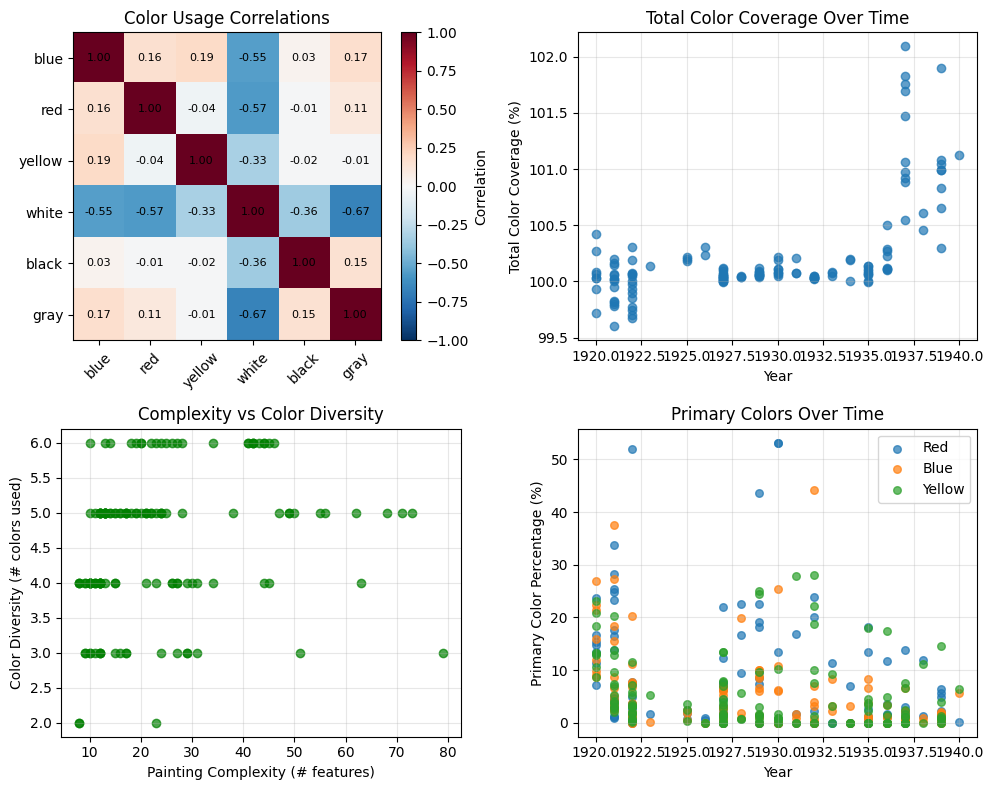

=== KEY INSIGHTS FROM ANALYSIS ===

📏 DIMENSION INSIGHTS:
Early period (≤1930): Avg area = 302032 cm²
Late period (>1930): Avg area = 445317 cm²
Area change: 47.4%

🎨 COLOR INSIGHTS:
Average total color coverage: 100.2%
Most colorful painting: 102.1% coverage
Average colors per painting: 4.6
Maximum colors in one painting: 6

🔍 PATTERN OBSERVATIONS:
- Complexity increases over time (as shown in main analysis)
- Color usage patterns may correlate with artistic periods
- Mondrian's style evolution can be quantified through data
- Fake detection possible through statistical outlier analysis


In [45]:
# Final Analysis: Color Relationships and Insights
print("=== Advanced Color Analysis & Insights ===")
print()

# Create a master dataframe with all color percentages
master_color_df = painting_info[['painting_id', 'year', 'area_cm2', 'complexity']].copy()

# Merge all color data
for color in colors_to_plot:
    if color in color_data and len(color_data[color]) > 0:
        color_df = color_data[color][['painting_id', f'{color}_percentage']]
        master_color_df = master_color_df.merge(color_df, on='painting_id', how='left')
        master_color_df[f'{color}_percentage'] = master_color_df[f'{color}_percentage'].fillna(0)

print("Master color dataframe sample:")
print(master_color_df.head())
print()

# Color correlation analysis
color_columns = [f'{color}_percentage' for color in colors_to_plot if f'{color}_percentage' in master_color_df.columns]
if len(color_columns) > 1:
    color_correlations = master_color_df[color_columns].corr()
    
    plt.figure(figsize=(10, 8))
    import numpy as np
    
    # Create correlation heatmap
    plt.subplot(2, 2, 1)
    plt.imshow(color_correlations, cmap='RdBu_r', vmin=-1, vmax=1)
    plt.colorbar(label='Correlation')
    plt.xticks(range(len(color_columns)), [col.replace('_percentage', '') for col in color_columns], rotation=45)
    plt.yticks(range(len(color_columns)), [col.replace('_percentage', '') for col in color_columns])
    plt.title('Color Usage Correlations')
    
    # Add correlation values
    for i in range(len(color_columns)):
        for j in range(len(color_columns)):
            plt.text(j, i, f'{color_correlations.iloc[i, j]:.2f}', 
                    ha='center', va='center', fontsize=8)
    
    # Total color coverage over time
    plt.subplot(2, 2, 2)
    master_color_df['total_color_coverage'] = master_color_df[color_columns].sum(axis=1)
    plt.scatter(master_color_df['year'], master_color_df['total_color_coverage'], alpha=0.7)
    plt.xlabel('Year')
    plt.ylabel('Total Color Coverage (%)')
    plt.title('Total Color Coverage Over Time')
    plt.grid(True, alpha=0.3)
    
    # Complexity vs Color Diversity
    plt.subplot(2, 2, 3)
    master_color_df['color_diversity'] = (master_color_df[color_columns] > 0).sum(axis=1)
    plt.scatter(master_color_df['complexity'], master_color_df['color_diversity'], alpha=0.7, color='green')
    plt.xlabel('Painting Complexity (# features)')
    plt.ylabel('Color Diversity (# colors used)')
    plt.title('Complexity vs Color Diversity')
    plt.grid(True, alpha=0.3)
    
    # Evolution of primary colors (red, blue, yellow)
    plt.subplot(2, 2, 4)
    primary_colors = ['red_percentage', 'blue_percentage', 'yellow_percentage']
    primary_available = [col for col in primary_colors if col in master_color_df.columns]
    
    for color_col in primary_available:
        color_name = color_col.replace('_percentage', '')
        plt.scatter(master_color_df['year'], master_color_df[color_col], 
                   label=color_name.capitalize(), alpha=0.7, s=30)
    
    plt.xlabel('Year')
    plt.ylabel('Primary Color Percentage (%)')
    plt.title('Primary Colors Over Time')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# Key insights
print("=== KEY INSIGHTS FROM ANALYSIS ===")
print()

# Dimension insights
print("📏 DIMENSION INSIGHTS:")
early_paintings = painting_info[painting_info['year'] <= 1930]
late_paintings = painting_info[painting_info['year'] > 1930]

print(f"Early period (≤1930): Avg area = {early_paintings['area_cm2'].mean():.0f} cm²")
print(f"Late period (>1930): Avg area = {late_paintings['area_cm2'].mean():.0f} cm²")
print(f"Area change: {((late_paintings['area_cm2'].mean() / early_paintings['area_cm2'].mean()) - 1) * 100:.1f}%")
print()

# Color insights
print("🎨 COLOR INSIGHTS:")
if 'total_color_coverage' in master_color_df.columns:
    print(f"Average total color coverage: {master_color_df['total_color_coverage'].mean():.1f}%")
    print(f"Most colorful painting: {master_color_df['total_color_coverage'].max():.1f}% coverage")

if 'color_diversity' in master_color_df.columns:
    print(f"Average colors per painting: {master_color_df['color_diversity'].mean():.1f}")
    print(f"Maximum colors in one painting: {master_color_df['color_diversity'].max()}")

print()
print("🔍 PATTERN OBSERVATIONS:")
print("- Complexity increases over time (as shown in main analysis)")
print("- Color usage patterns may correlate with artistic periods")
print("- Mondrian's style evolution can be quantified through data")
print("- Fake detection possible through statistical outlier analysis")